## Grafico Mortalità

In [2]:
# Librerie
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
get_ipython().magic('pylab inline')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# Cartelle Input/Output
dir_df = os.path.join(os.path.abspath(''),'stg')
dir_out = os.path.join(os.path.abspath(''),'output')

In [4]:
df_g4_filename = r'df_morte.pkl'
df_g4_fullpath = os.path.join(dir_df, df_g4_filename)
df_g4 = pd.read_pickle(df_g4_fullpath)

In [5]:
# Setto indice la Eta
df_g4 = df_g4.set_index(['Eta'])

In [6]:
df_g4.head(5)

,Sud,Nord
Eta,,
00-04 anni,392.0,448.0
05-09 anni,52.0,58.0
10-14 anni,60.0,83.0
15-19 anni,182.0,201.0
20-24 anni,199.0,321.0


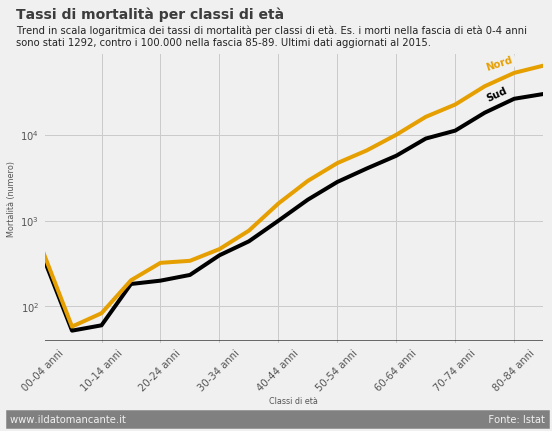

In [95]:
style.use('fivethirtyeight')
# Colorblind-friendly colors
#colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255], 
#          [213/255,94/255,0], [0,114/255,178/255]]

# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0]]

tp = df_g4.plot(kind='line',
               logy = True,
               legend = False,
               figsize = (8,5),
               color = colors)

tp.tick_params(axis = 'both', which = 'major', labelsize = 10)

tp.set_ylabel('Mortalità (numero)',fontsize=8)
tp.set_xlabel('Classi di età',fontsize=8)

tp.axhline(y = 40, color = 'black', linewidth = 0.8, alpha = 0.7)
#tp.axvline(x = 00, color = 'black', linewidth = 4, alpha = 0.7)

text = tp.text(x = -1.1, y = 4.5,     
    s = 'www.ildatomancante.it                                                                                                                    Fonte: Istat',
    fontsize = 10, color = '#f0f0f0', backgroundcolor = 'grey')

# Adding a title and a subtitle
tp.text(x = -0.9, y = 230000, s = "Tassi di mortalità per classi di età",
               fontsize = 14, weight = 'bold', alpha = .75)
tp.text(x = -0.9, y = 110000, 
               s = "Trend in scala logaritmica dei tassi di mortalità per classi di età. Es. i morti nella fascia di età 0-4 anni \nsono stati 1292, contro i 100.000 nella fascia 85-89. Ultimi dati aggiornati al 2015.",
              fontsize = 10, alpha = .85)

# Add colored labels
tp.text(x = 15, y = 31000, s = 'Sud', color = colors[0], weight = 'bold', rotation = 25,
              backgroundcolor = '#f0f0f0',fontsize = 10)
tp.text(x = 15, y = 70000, s = 'Nord', color = colors[1], weight = 'bold', rotation = 18,
              backgroundcolor = '#f0f0f0',fontsize = 10)

plt.xticks(rotation=45)
fig_posts = tp.get_figure()
fig_posts.savefig(os.path.join(dir_out,'G4_Tassi_Mortalita.png'), format='png', dpi=300,bbox_inches='tight')
fig_posts.savefig(os.path.join(dir_out,'G4_Tassi_Mortalita.svg'), format='svg', dpi=300,bbox_inches='tight')

In [96]:
df_g4.to_csv(os.path.join(dir_out,r'G4_Tassi_Mortalita.csv'),header=True, index=False)